In [ ]:
AI AGENTS

Weather AI Agent Application:


To define the logic for this AI agent, I utilize prompt engnr. to instruct the LLM on how to access and retrieve relevant information from my private db . This enables the AI agent to:
-Read: Retrieve the necessary weather-data information from the database.
-Write: Update or store the processed data as needed(furthur).


By applying specific logic to these processes, the LLM is trained to recognize patterns and similarities in the data it retrieves, which enhances the accuracy of the answers it generates. Over time, with feedback from the database and external inputs, the model adapts to improve its decision-making ability, ensuring better acceptance and reliability of the outputs.



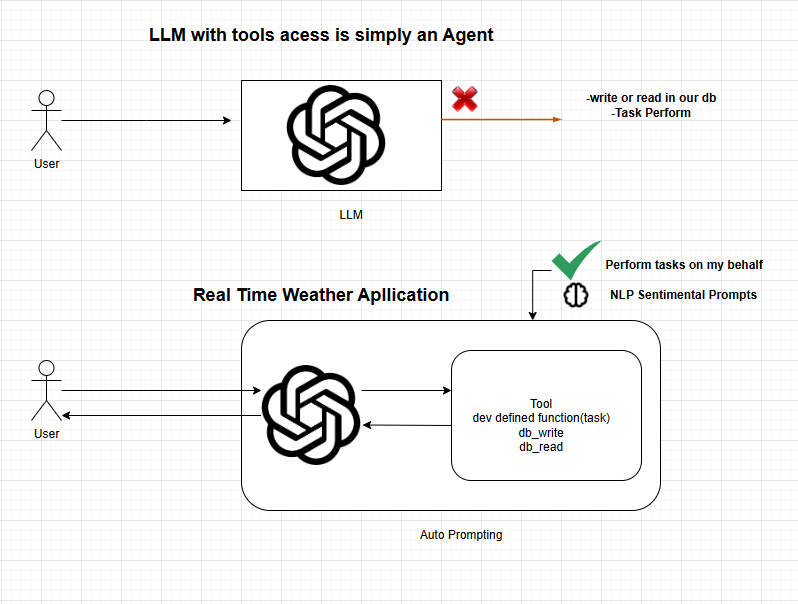

In [ ]:
import openai
import json

OPENAI_KEY ="-----------------------------"


openai.api_key = OPENAI_KEY

def get_weather_data(city: str) -> str:
    weather_map = {
        'mumbai': '32°C',
        'gujarat': '30°C',
        'berlin': '3°C',
        'heidelberg': '5°C',
        'munich': '10°C',
        'frankfurt': '11°C'
    }
    return weather_map.get(city.lower(), "Unknown")



In [ ]:
user = "hi, what is the weather of Mumbai??"

response = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": user}]
)

print(response["choices"][0]["message"]["content"])

I don't have real-time weather capabilities to provide current information. However, you can easily check the weather in Mumbai by using a weather website or app for the most up-to-date information. Generally, Mumbai experiences a tropical climate, with a hot and humid season, a monsoon season, and a cooler winter season. If you need specific details about a certain time of year or seasonal trends, feel free to ask!


In [ ]:

tools = {"getWeatherDetails": get_weather_data}
messages = [{"role": "system", "content": SYSTEM_PROMPT}]


In [ ]:
SYSTEM_PROMPT = """
You are an AI Assistant with START, PLAN, ACTION, OBSERVATION, and OUTPUT states.
Wait for the user prompt and first Plan using available tools.
After Planning, take action with appropriate tools and wait for observation based on any action.
Once you get the observation, RETURN the AI Response based on the START Prompt and the observation.

Strictly follow JSON Format as in the example:

START
{ "type": "user", "user": "What is the sum of weather of Mumbai and Berlin?" }

{ "type": "plan", "plan": "I will call getWeatherDetails for Mumbai" }

{ "type": "action", "function": "getWeatherDetails", "input": "Mumbai" }

{ "type": "observation", "observation": "32°C" }

{ "type": "plan", "plan": "I will call getWeatherDetails for Berlin" }

{ "type": "action", "function": "getWeatherDetails", "input": "Berlin" }

{ "type": "observation", "observation": "3°C" }

{ "type": "output", "output": "The sum of weather of Mumbai and Berlin is 35°C" }
"""

In [ ]:
while True:
    query = input("User: ")
    user_input = {"type": "user", "user": query}
    messages.append({"role": "user", "content": json.dumps(user_input)})

    while True:
        response = openai.ChatCompletion.create(
            model="gpt-4o",
            messages=messages,
            response_format={"type": "json_object"}
        )

        result = json.loads(response["choices"][0]["message"]["content"])
        messages.append({"role": "assistant", "content": json.dumps(result)})

        if result["type"] == "output":
            print(f"Bot: {result['output']}")
            break
        elif result["type"] == "action":
            function_name = result["function"]
            if function_name in tools:
                observation = tools[function_name](result["input"])
                obs = {"type": "observation", "observation": observation}
                messages.append({"role": "assistant", "content": json.dumps(obs)})
            else:
                print("Bot: Error - Function not found.")
                break


User: what is weather in Mumbai?
Bot: The current weather in Mumbai is 32°C.
User: and what about in Berlin?
Bot: The current weather in Berlin is 3°C.


User asks a question
→ Example: "What is the sum of the weather in Mumbai and Berlin?"

AI plans the steps
→ It decides to fetch the weather for Mumbai and then Berlin.

AI calls a function
→ The function get_weather_data(city) retrieves the weather data.

AI gets observations
→ Example: Mumbai = 32°C, Berlin = 3°C.
AI returns the final result → "The sum of the weather of Mumbai and Berlin is 35°C."




Your system follows a structured process (START → PLAN → ACTION → OBSERVATION → OUTPUT) to interact with users and tools in a logical manner.